In [1]:
import math

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [2]:
nn_full_data = pd.read_csv('non_normalized_full_data.csv')

In [3]:
nn_full_data = nn_full_data.drop(columns=['Unnamed: 0'])
for col in nn_full_data.columns:
    print(col)

f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday_avg
f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday_std
f_blue:phone_bluetooth_doryab_uniquedevicesall:evening_avg
f_blue:phone_bluetooth_doryab_uniquedevicesall:evening_std
f_call:phone_calls_rapids_missed_count:allday_avg
f_call:phone_calls_rapids_missed_count:allday_std
f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday_avg
f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday_std
f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday_avg
f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday_std
f_loc:phone_locations_barnett_hometime:allday_avg_weekdays
f_loc:phone_locations_barnett_hometime:allday_std_weekdays
f_loc:phone_locations_barnett_hometime:allday_avg_weekend
f_loc:phone_locations_barnett_disttravelled:allday_avg_weekdays
f_loc:phone_locations_barnett_disttravelled:allday_std_weekdays
f_loc:phone_location

In [4]:
for column in nn_full_data.columns:
    if nn_full_data[column].isna().any(): 
        mode_value = nn_full_data[column].mode()[0]  
        nn_full_data[column].fillna(mode_value, inplace=True)

/var/folders/_3/hl68jd8d5_37gmc5q_92ntzw0000gn/T/ipykernel_21044/506745486.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nn_full_data[column].fillna(mode_value, inplace=True)


In [1]:
columns_to_normalize = nn_full_data.columns[:-2]
scaler = MinMaxScaler()
nn_full_data[columns_to_normalize] = scaler.fit_transform(nn_full_data[columns_to_normalize])
# print(nn_full_data.head())

NameError: name 'nn_full_data' is not defined

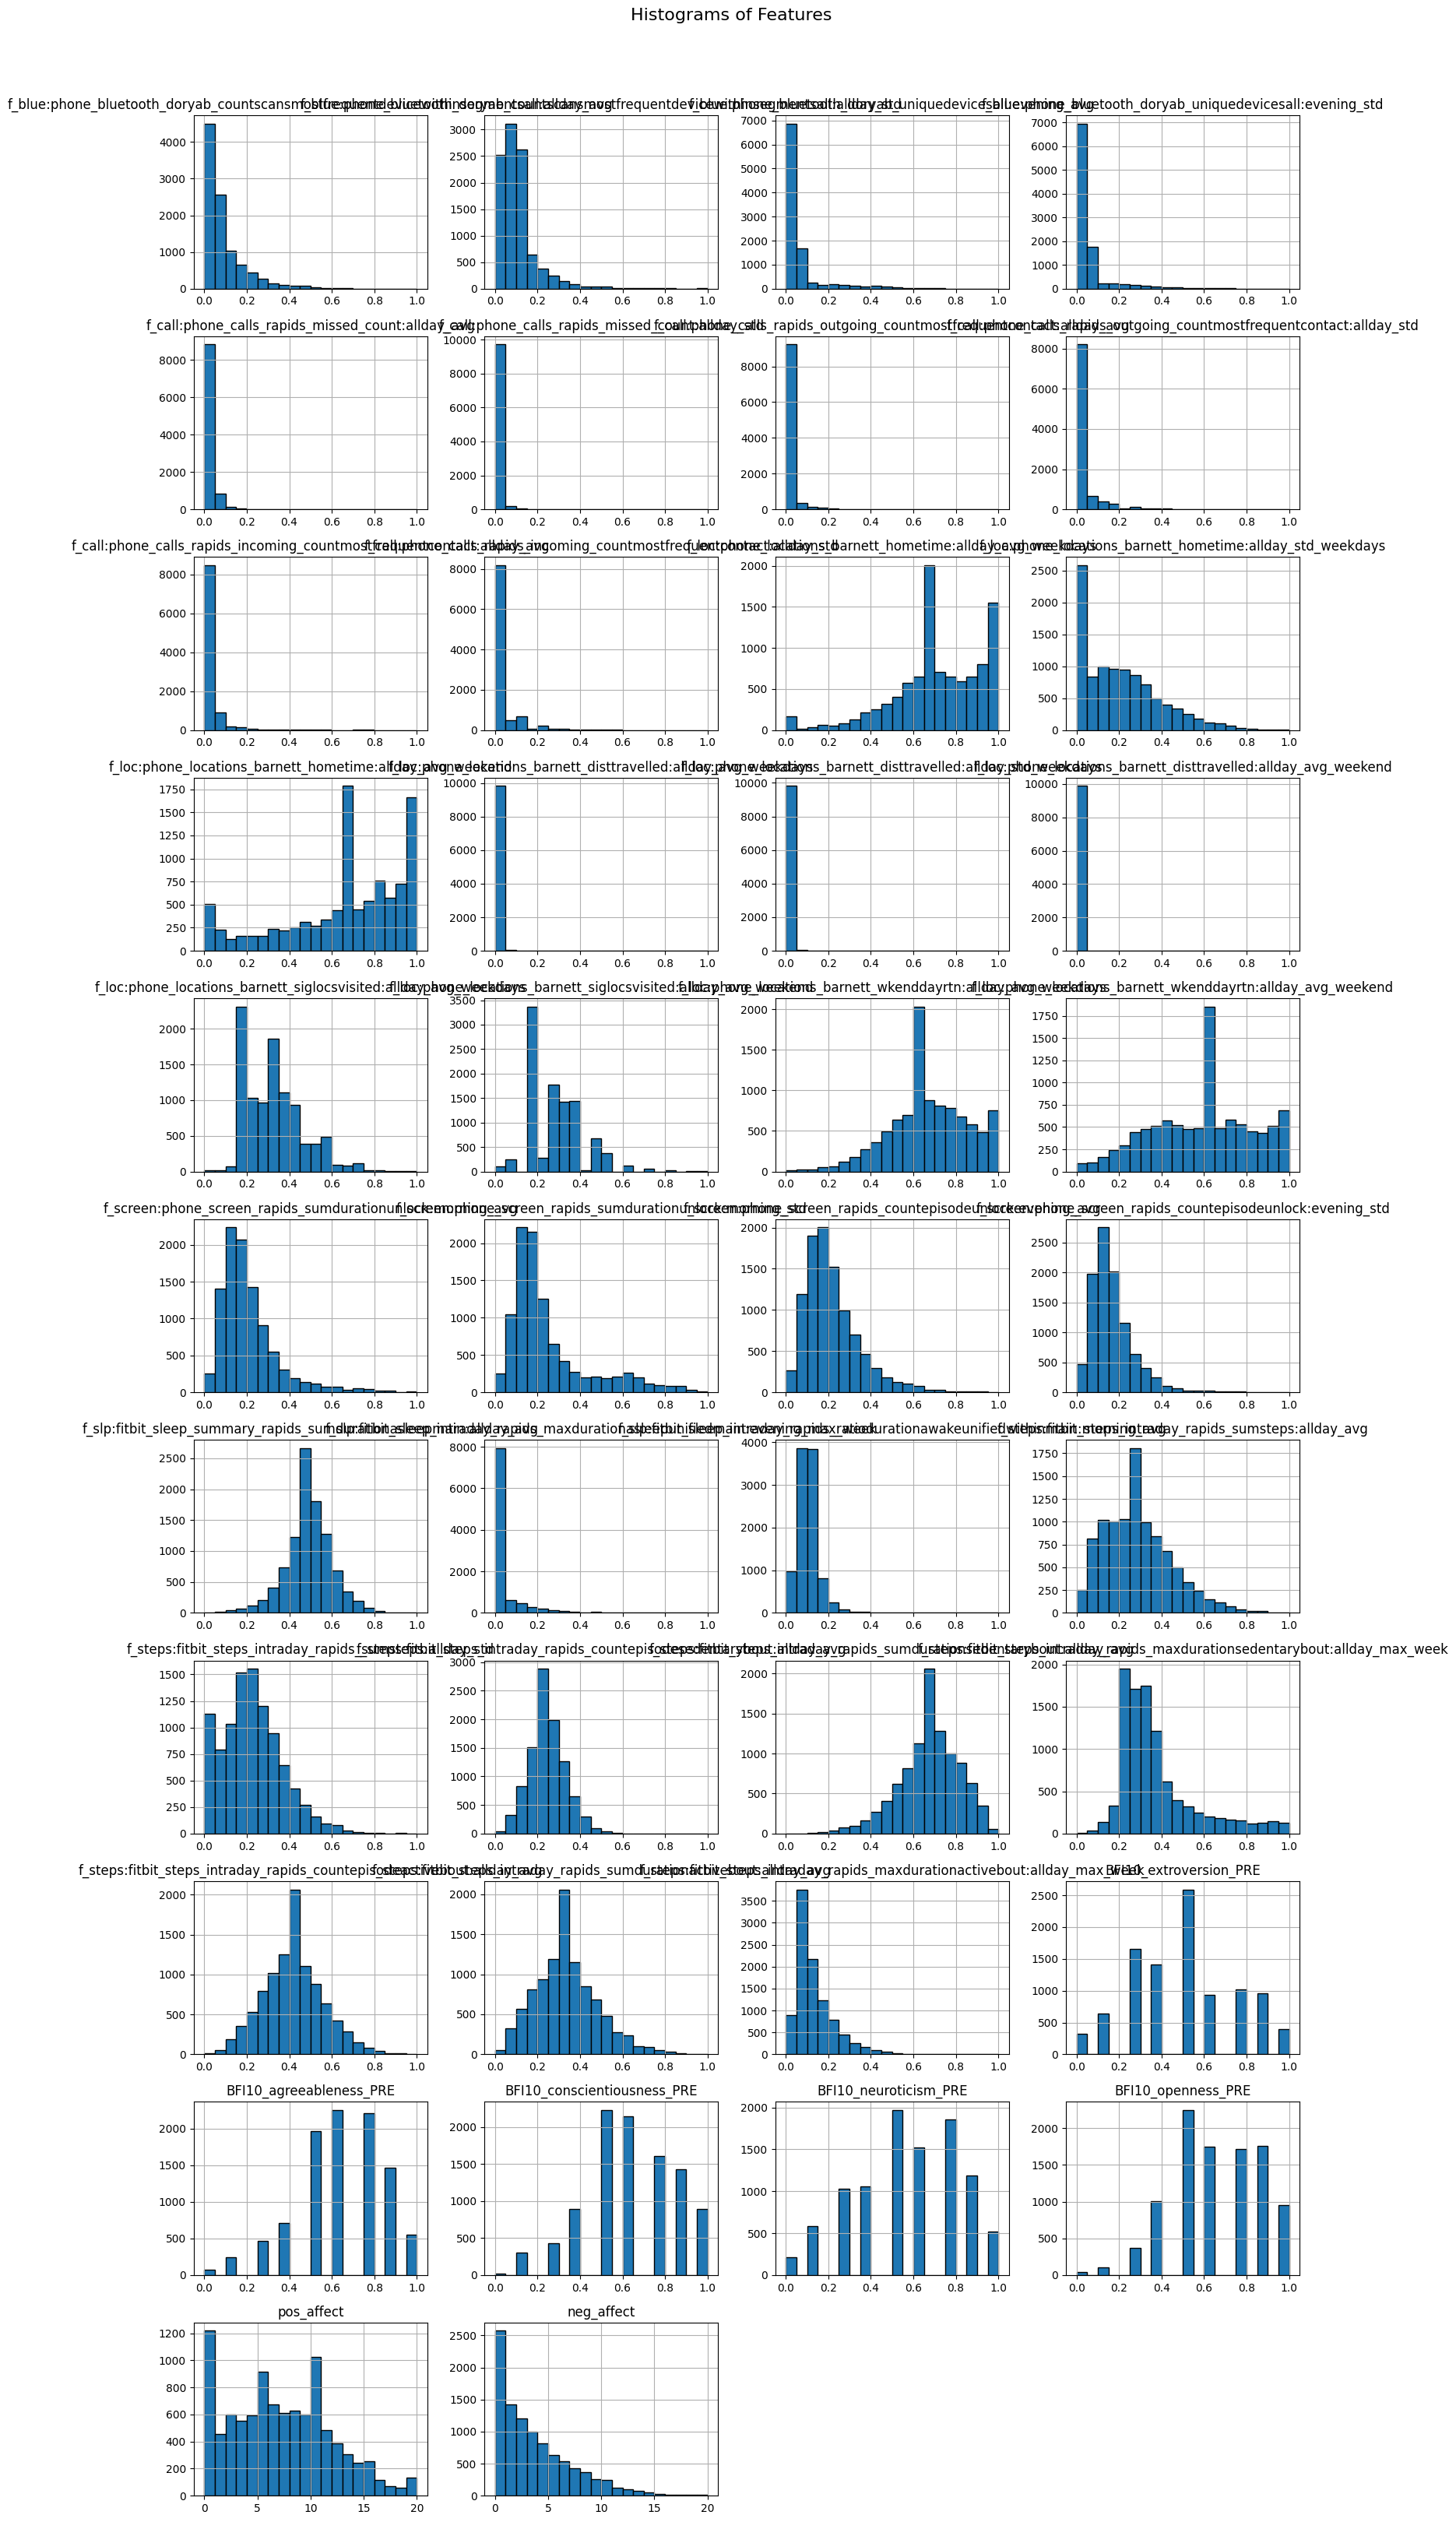

In [6]:
num_columns = nn_full_data.shape[1]  
cols = 4  
rows = math.ceil(num_columns / cols)  

nn_full_data.hist(bins=20, figsize=(15, rows * 3), layout=(rows, cols), edgecolor='black')

plt.suptitle('Histograms of Features', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

In [7]:
nn_full_data[column].isna().any()

np.False_

In [8]:
nn_full_data.to_csv('normalized_full_data.csv')